# 1.Framing the problem statement
Here,we are trying to predict the fraudalent and non fraudlent transactions of the credit cards.
This is classification model and the target variable is **Class**

# 2. Data Analysis
Here,we will analyse the dataset.The different steps are as below:

*   Step 1:Hypothesis testing
*   Step 2:EDA(univariate/bivariate)
*   Step 3:Missing data
*   Step 4:Outlier
*   Step 5: Categorical data













In [ ]:
# # step 1: Hypothesis testing

# Null Hypothesis:There is no relationship between predictor and the target
# Alternate Hypothesis:There is significant relationship between target and predictors

# import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)

# import dataset
data = pd.read_csv('creditcard.csv')
print(data.shape)
print(data.columns)

# get the categorical columns
catCols = data.select_dtypes('object').columns
print('categorical columns:',catCols,len(catCols))

# get the numerical columns
numCols = data.select_dtypes('number').columns
print('numerical columns:',numCols,len(numCols))

data['Class'] = np.where(data['Class'] == 1.0,1,0)

print(data.Class.unique())

# we wil carry out z-test on the numerical columns to find oot their probable impact on the target

from statsmodels.stats import weightstats as stests
significant_numCols,in_significant_numCols = [],[]

for i in numCols:
  if i != 'Class':#as class  is the target variable
    p_val = stests.ztest(data[i],data.Class)
    p_val = p_val[1]
    print('column:',i,'p-val:',p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_numCols.append(i)
      print(status)
      print("-------------------------------------------------")

    else:
      status = 'Accept Null Hypothesis,InSignificant predictor'
      in_significant_numCols.append(i)
      print(status)
      print("-------------------------------------------------")

print('significant numeric columns:',significant_numCols,len(significant_numCols))
print('In-significant numeric columns:',in_significant_numCols,len(in_significant_numCols))



(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
categorical columns: Index([], dtype='object') 0
numerical columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 31
[0 1]
column: Time p-val: 0.0
Reject Null Hypothesis,Significant predictor
-------------------------------------------------
column: V1 p-val: 0.6379470940087206
Accept Null Hypothesis,InSignificant predictor
-------------------------------------------------
column: V2 p-val: 0.5767653712332146
Accept Null Hypothesis,InSignificant predictor
-------------------------------------------

In [ ]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import the dataset
data = pd.read_csv('creditcard.csv')
print(data.shape)
print(data.columns,len(data.columns))
print(data.head())

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 31
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


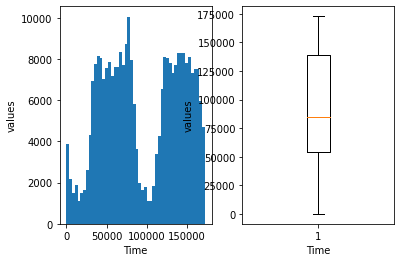

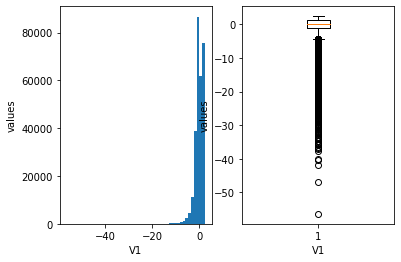

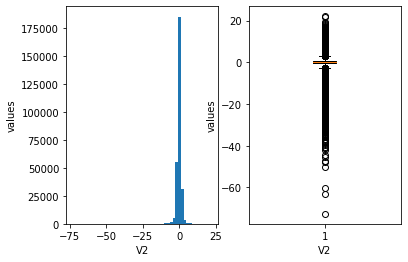

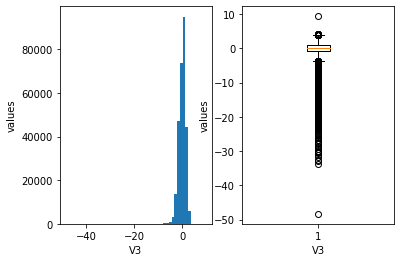

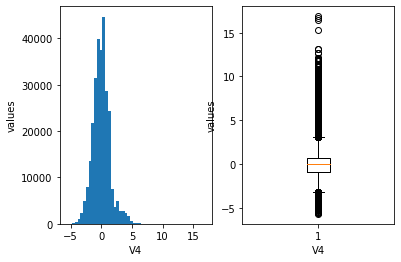

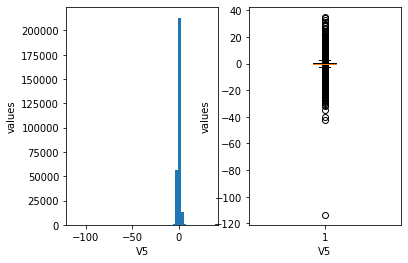

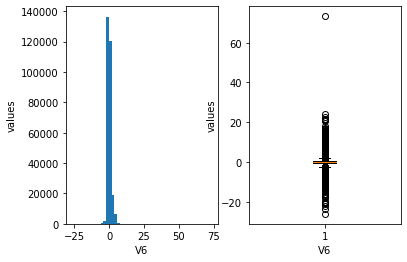

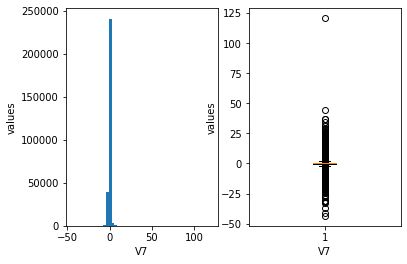

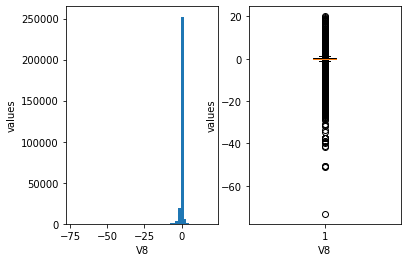

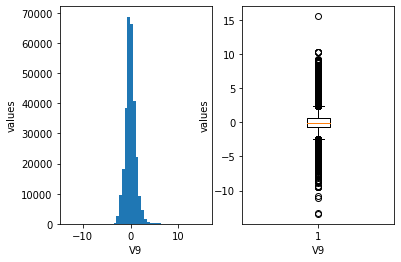

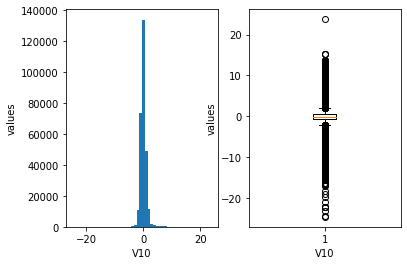

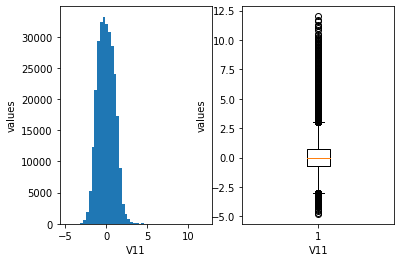

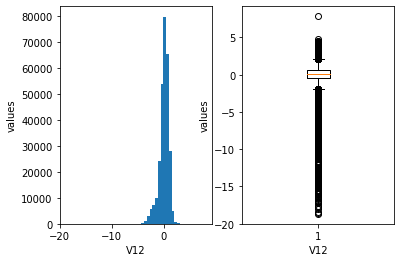

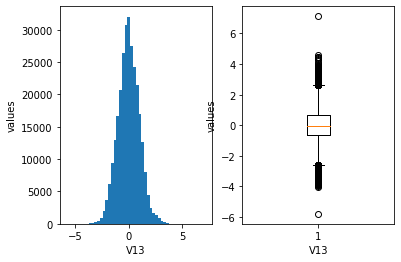

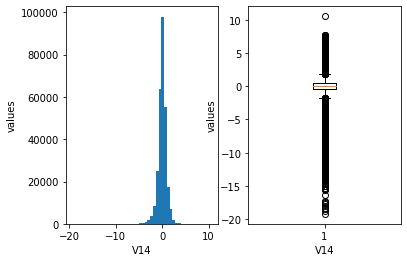

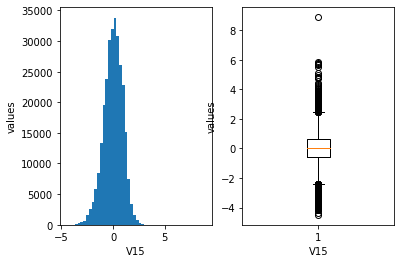

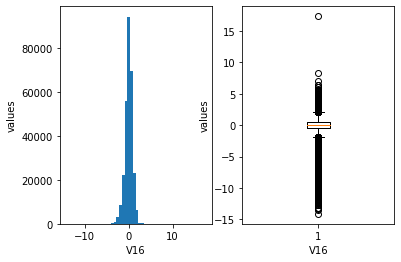

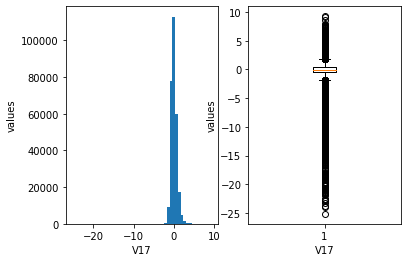

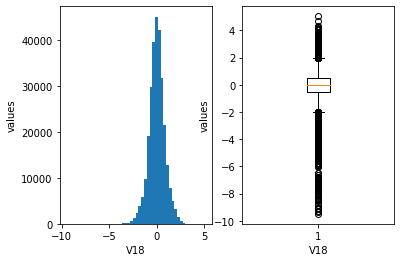

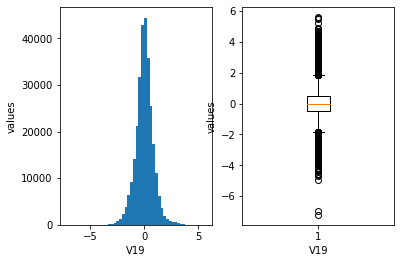

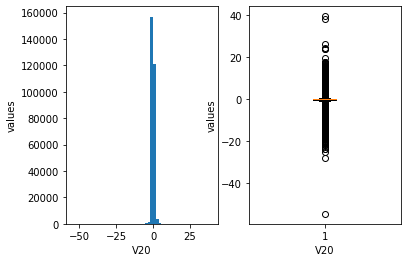

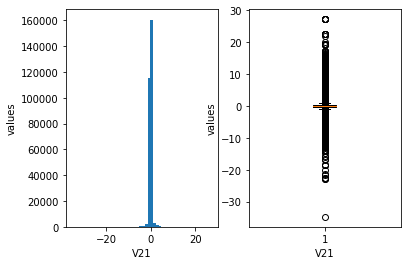

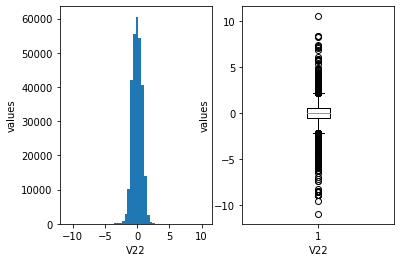

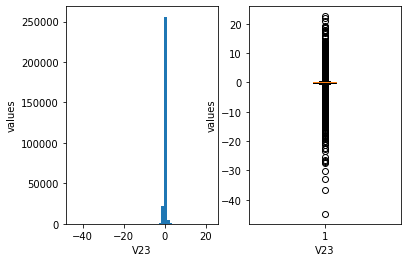

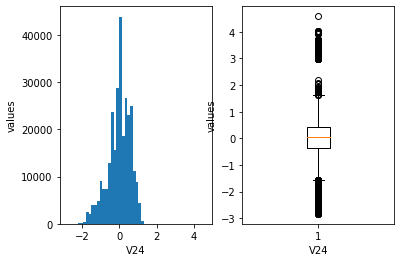

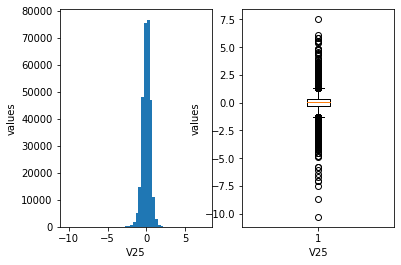

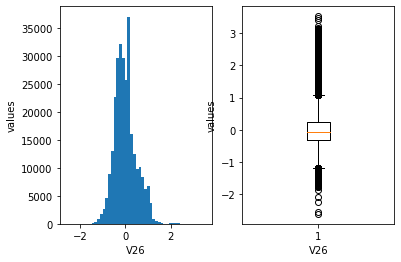

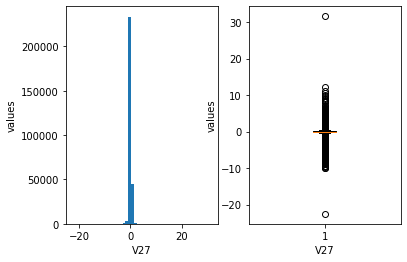

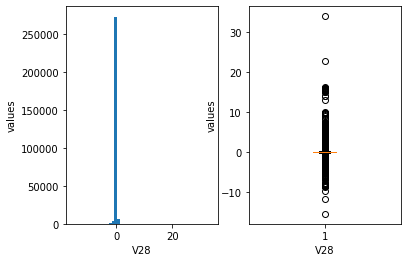

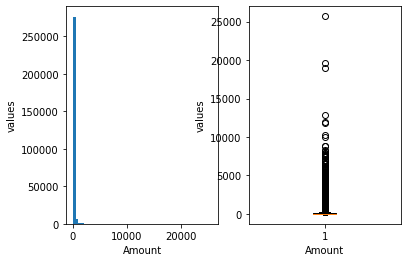

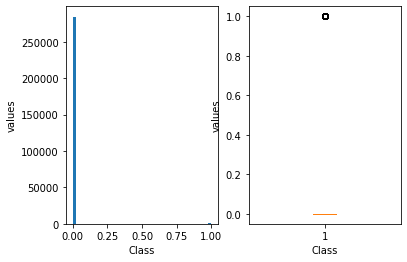

In [ ]:
# # step 2: EDA(univariate/Bivariate)

# Univariate analysis of numerical columns with histogram/distplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins = 50)
  plt.xlabel(i)
  plt.ylabel('values')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('values')
  plt.show()

            Time            V1            V2  ...           V28    Amount     Class
Time    1.000000  1.173963e-01 -1.059333e-02  ... -9.412688e-03 -0.010596 -0.012323
V1      0.117396  1.000000e+00  4.697350e-17  ...  9.820892e-16 -0.227709 -0.101347
V2     -0.010593  4.697350e-17  1.000000e+00  ... -3.676415e-16 -0.531409  0.091289
V3     -0.419618 -1.424390e-15  2.512175e-16  ...  7.726948e-16 -0.210880 -0.192961
V4     -0.105260  1.755316e-17 -1.126388e-16  ... -5.863664e-17  0.098732  0.133447
V5      0.173072  6.391162e-17 -2.039868e-16  ... -3.299167e-16 -0.386356 -0.094974
V6     -0.063016  2.398071e-16  5.024680e-16  ...  4.813155e-16  0.215981 -0.043643
V7      0.084714  1.991550e-15  3.966486e-16  ... -6.836764e-17  0.397311 -0.187257
V8     -0.036949 -9.490675e-17 -4.413984e-17  ... -4.484325e-16 -0.103079  0.019875
V9     -0.008660  2.169581e-16 -5.728718e-17  ...  9.146779e-16 -0.044246 -0.097733
V10     0.030617  7.433820e-17 -4.782388e-16  ... -1.515934e-16 -0.101502 -0

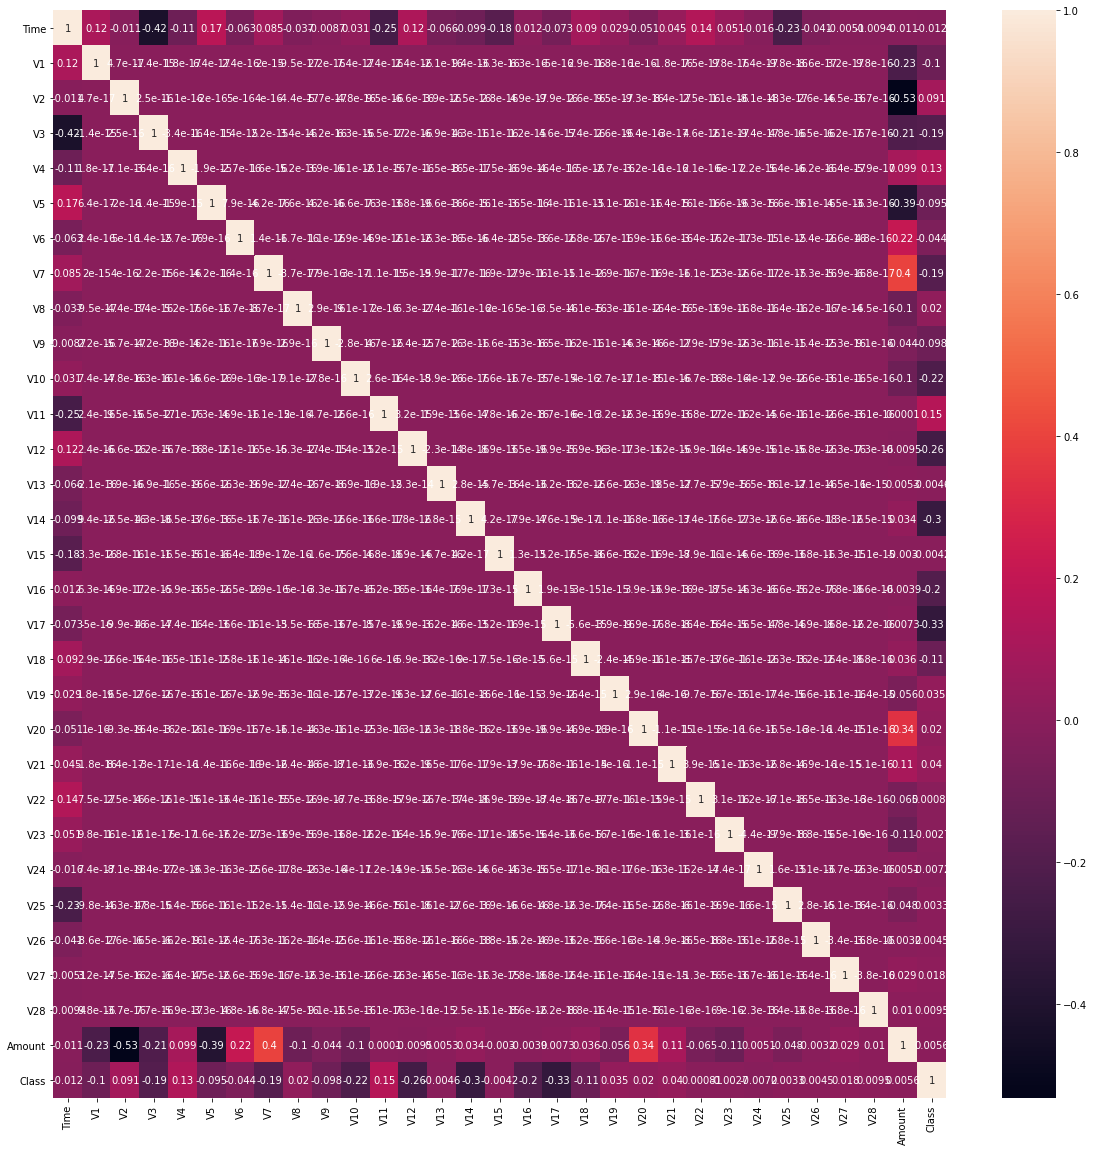

In [ ]:
# Bivariate analysis of numeric columns by co-relation matrix

import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(matrix,annot = True)

In [ ]:
# Step 3 :Check if missing values are present

print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# get the columns with null values

vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

print('columns with missing values:',vars_with_na,len(vars_with_na))

# get the percentage of missing values in each column
print(data[vars_with_na].isnull().mean())

columns with missing values: [] 0
Series([], dtype: float64)


In [ ]:
# visualize if there is any relationship between target and missing value column

def analyse_na_value(df,var):
  df = df.copy()
  # lets make a variable that shows 1 for missing value and 0 for otherwise

  df[var] = np.where(df[var].isnull(),1,0)

  df.groupby(var)['Class'].mean().plot.bar()
  plt.title(var)
  plt.show()

# lets run for each column in vars_with_na and visualise the relationship

for var in vars_with_na:
  analyse_na_value(data,var)

In [ ]:
# step 4.Numerical data visualization

print('numerical columns:',numCols,len(numCols))

# 1.-> visualize numerical columns
print(data[numCols].head())

print('length of dataset:',len(data))

numerical columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 31
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]
length of dataset: 284807


In [ ]:
# 2 -> lets make a list of descrete variables among the numerical columns

descrete_numCols = [var for var in numCols if len(data[var].unique())<20 ]

print('descrete numerical columns:',descrete_numCols,len(descrete_numCols))

descrete numerical columns: ['Class'] 1


continuous numerical columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] 30


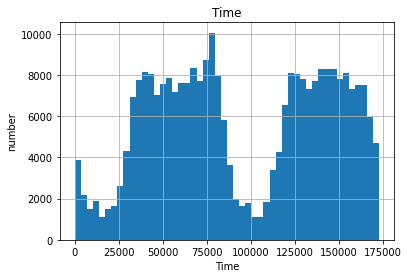

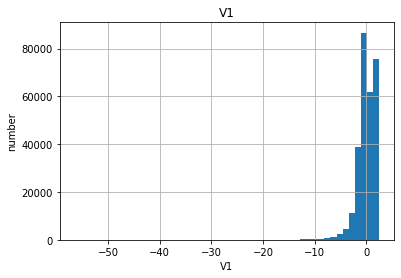

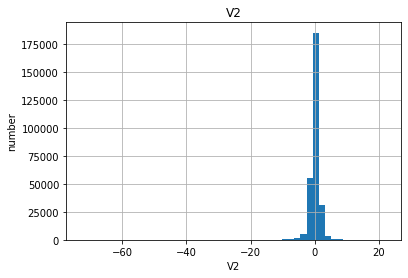

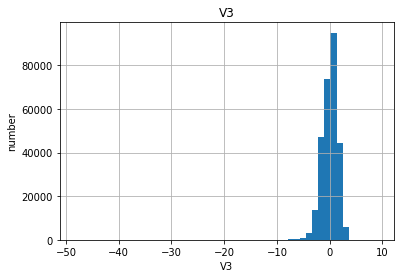

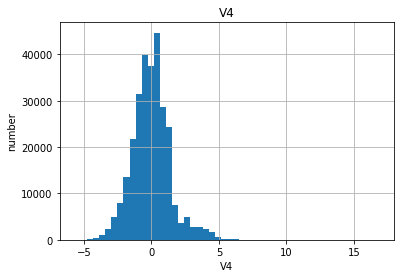

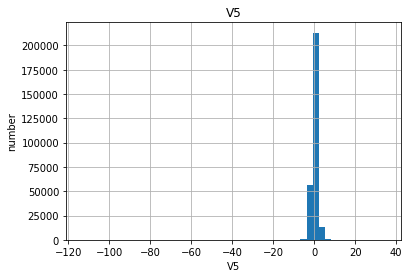

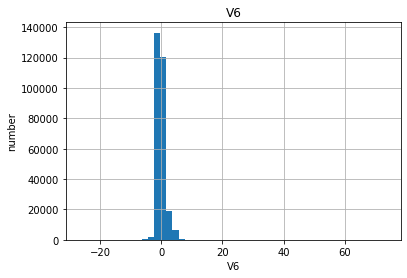

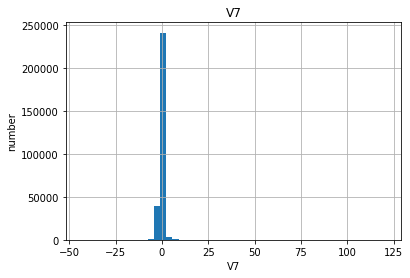

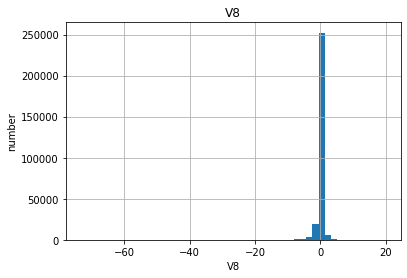

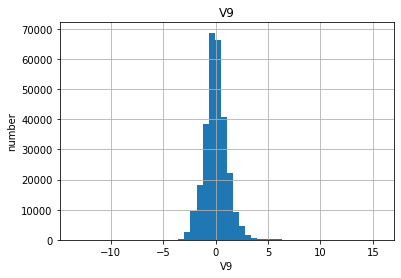

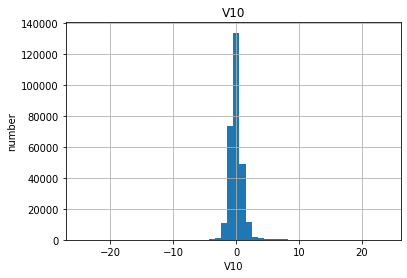

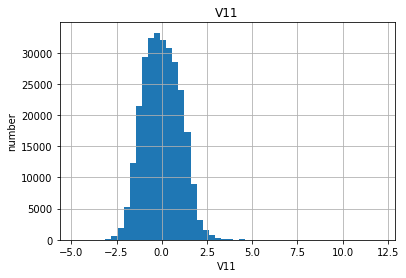

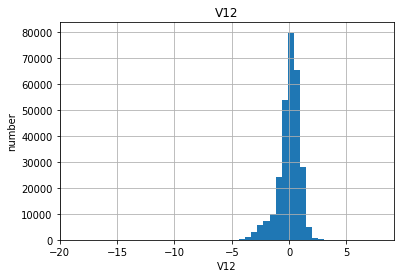

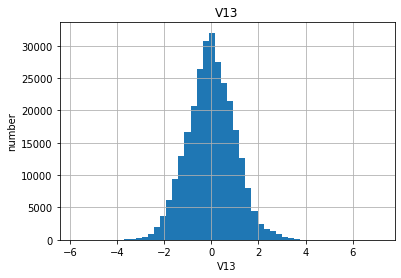

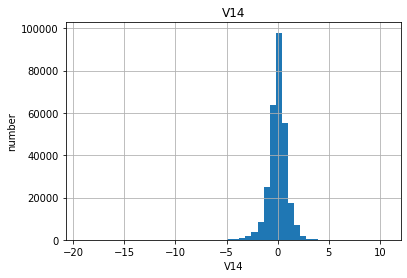

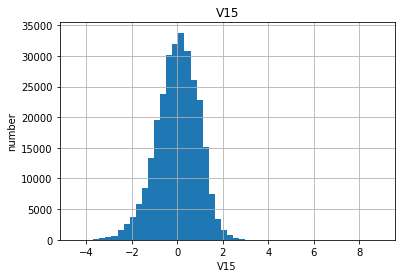

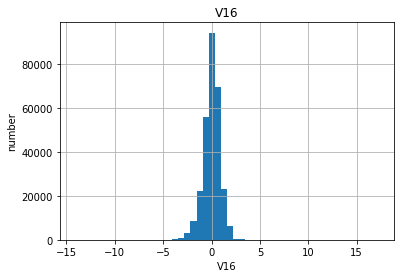

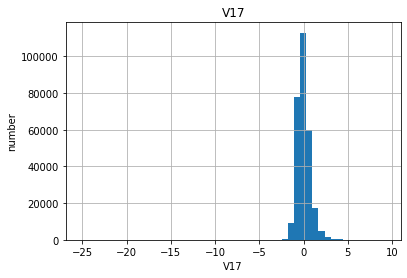

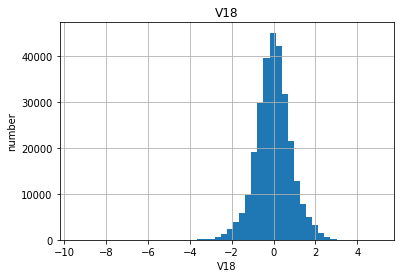

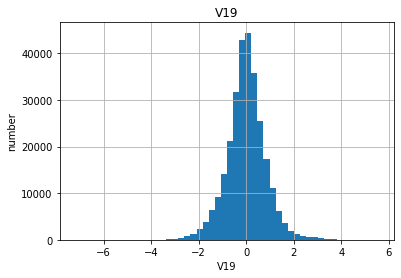

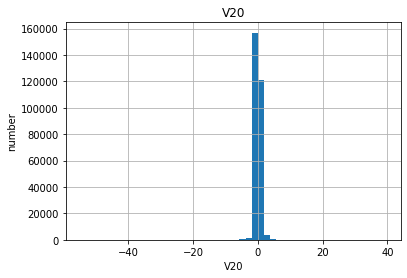

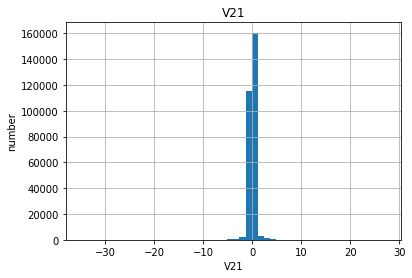

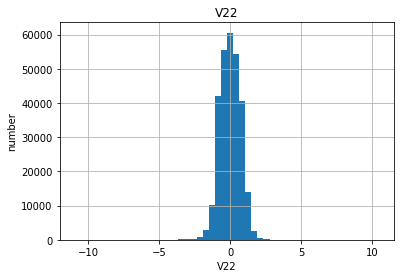

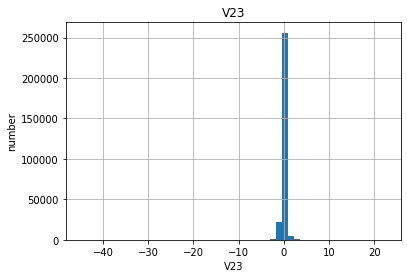

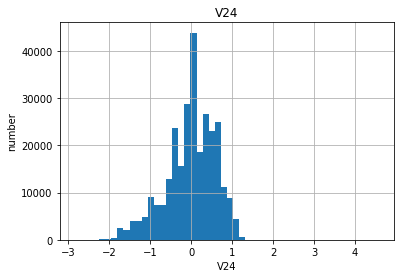

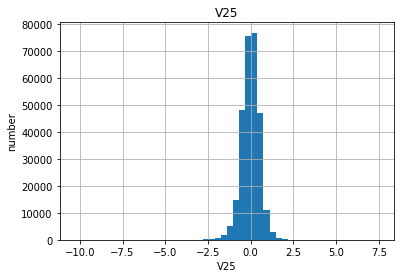

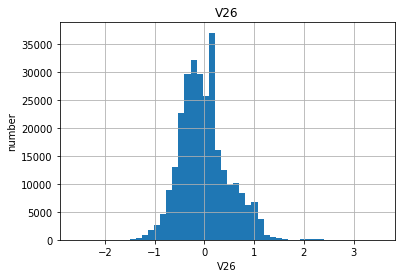

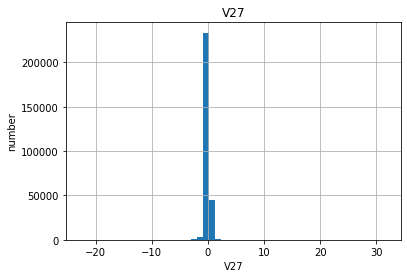

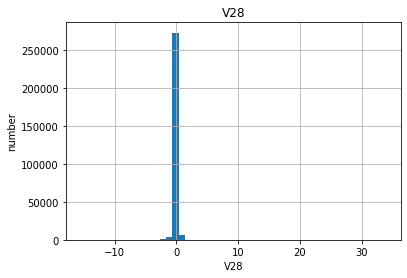

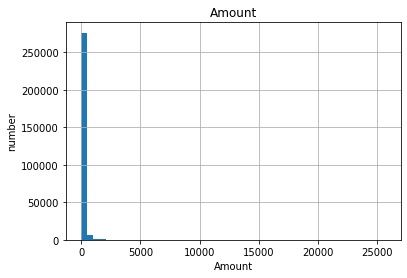

In [ ]:
# 3 -> lets make list of continuous numerical columns

cont_numCols = [var for var in numCols if len(data[var].unique()) > 20]

print('continuous numerical columns:',cont_numCols,len(cont_numCols))

# visualise continuous columns:
data[cont_numCols].head()

# visualize their contribution to target

def analyse_continuous(df,var):
  df = df.copy()
  df[var].hist(bins = 50)
  plt.ylabel('number')
  plt.xlabel(var)
  plt.title(var)
  plt.show()

for var in cont_numCols:
  analyse_continuous(data,var)


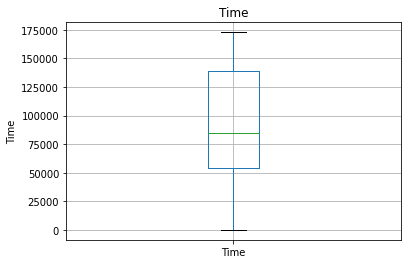

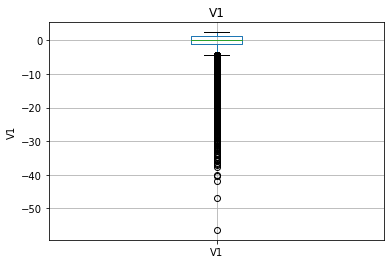

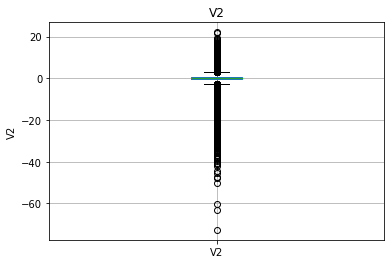

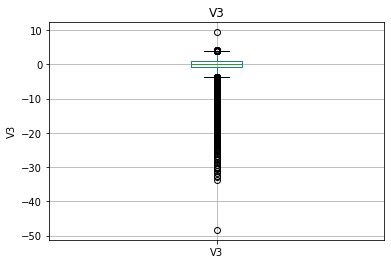

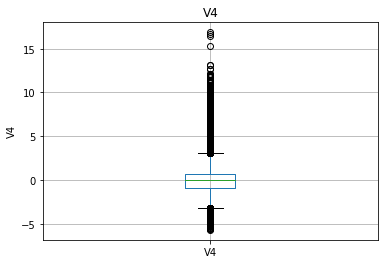

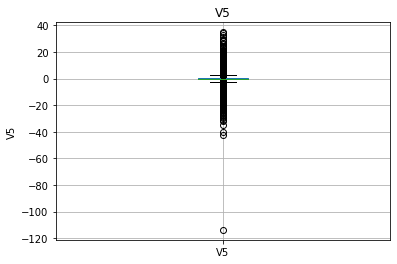

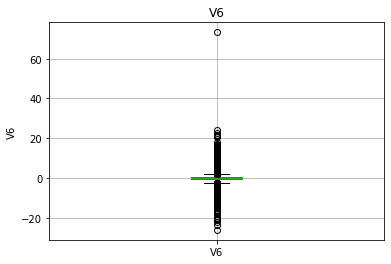

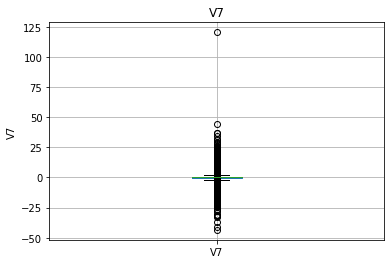

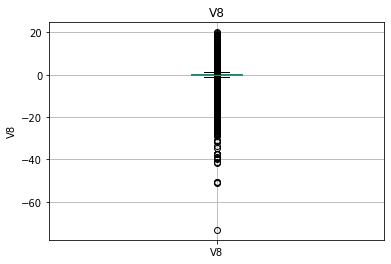

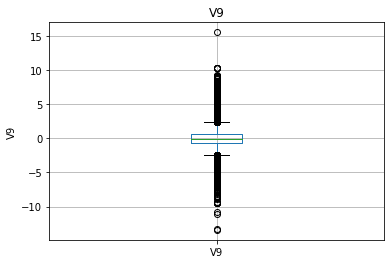

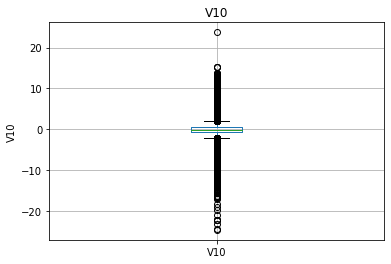

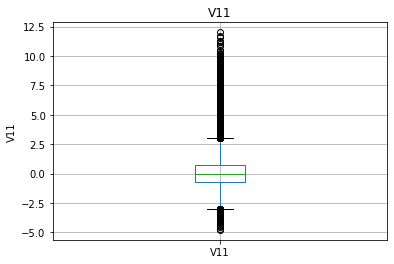

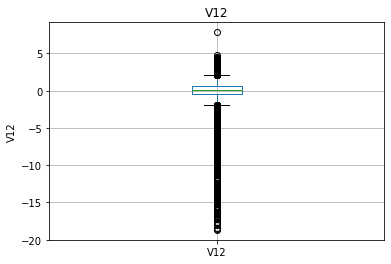

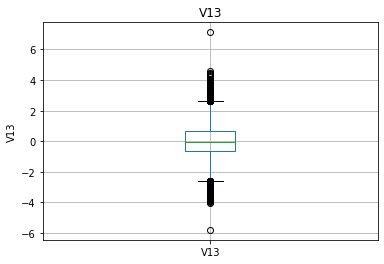

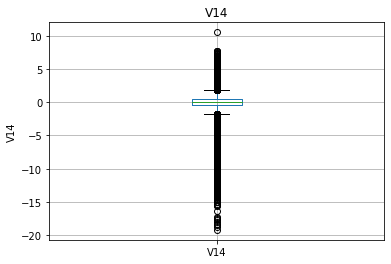

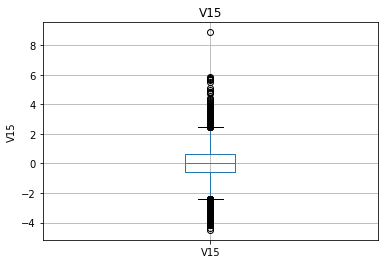

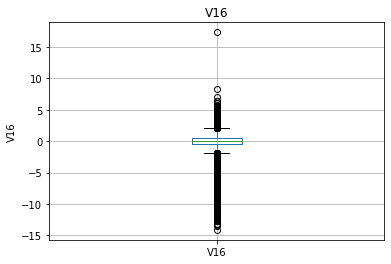

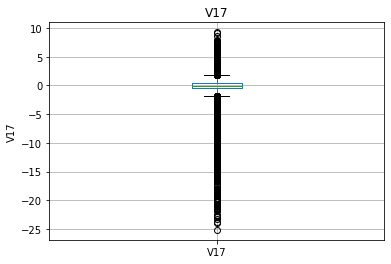

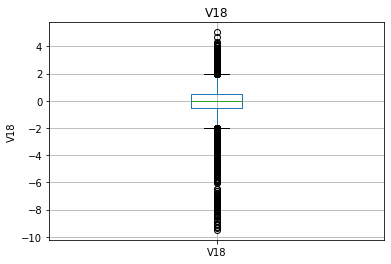

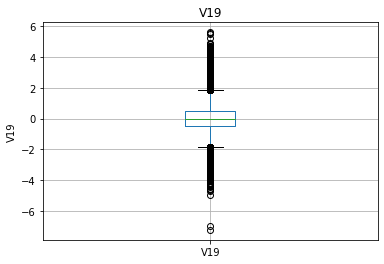

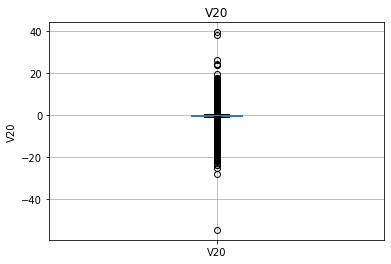

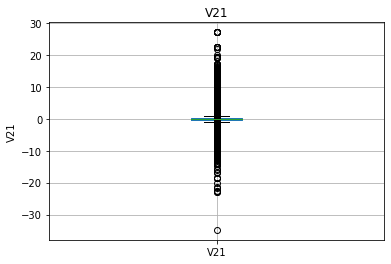

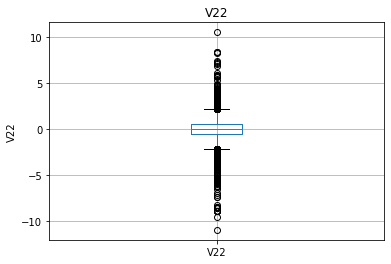

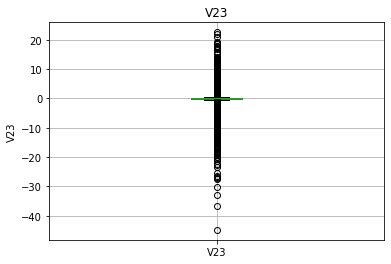

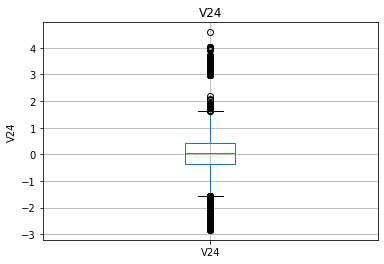

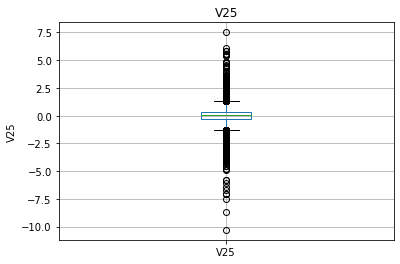

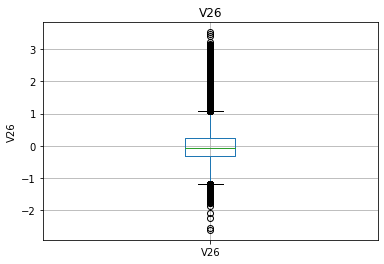

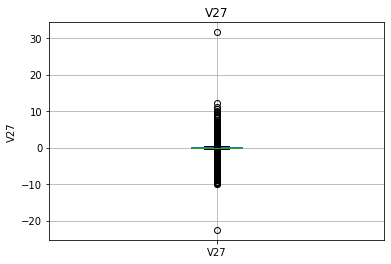

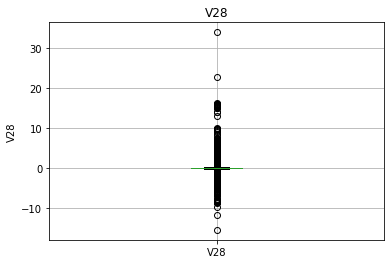

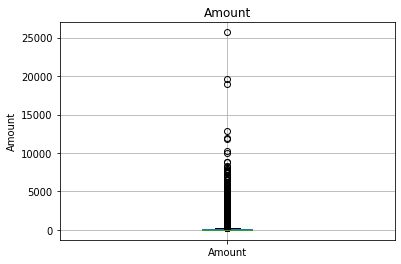

In [ ]:
# step 5:outlier visualization

# we will make boxplots on the continuous numerical columns to visualize the presence of outliers


def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.ylabel(var)
  plt.show()

for var in cont_numCols:
  find_outliers(data,var)


# noted the presence of outliers

In [ ]:
# step 6:categorical data visualisation

print('categorical columns:',catCols,len(catCols))

categorical columns: Index([], dtype='object') 0


# Feature Engineering
we will deal with all the problems faced above


*   train test split
*   missing value treatment
*   temporal variable treatment
*   non guassian distributed values
*   rare categorical value treatmnet
*   encoding categorical columns
*   feature scaling
   





In [ ]:
# 1 -> train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['Class'],test_size = 0.2,random_state = 0)
print(X_train.shape,X_test.shape)
# print(X_train.isnull().sum())

(227845, 31) (56962, 31)


In [ ]:
# 2 -> missing value treatment -- not required
# get the numerical columns with na values
# num_var_with_na = [var for var in data.columns if data[var].isnull().sum()>0 and data[var].dtypes != 'object']

# print('numerical columns with null values:',num_var_with_na,len(num_var_with_na))

# # visualize their percentage
# print(X_train[num_var_with_na].isnull().mean()*100)
# # visualize the data

# print(X_train[num_var_with_na].head())

# # replace the numerical missing values with median values of the column
# import warnings
# warnings.simplefilter(action = 'ignore')


# for var in num_var_with_na:
#   # mode = X_train[var].median()
#   median = X_train[var].median()

# # creating a new column with the record of missing
#   X_train[var+'_na'] = np.where(X_train[var].isnull(),1,0)
#   X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

# # replace missing values in train data
# for var in num_var_with_na:
#   median = data[var].median()
#   X_train[var] = X_train[var].fillna(median)


# # replace missing values in test data
# for var in num_var_with_na:
#   median = data[var].median()
#   X_test[var] = X_test[var].fillna(median)

print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(X_train.columns)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
    

In [ ]:
# 3 -> No need of temporal variable treatment,skipping the step


dataset columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
conntinuous_numeric columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


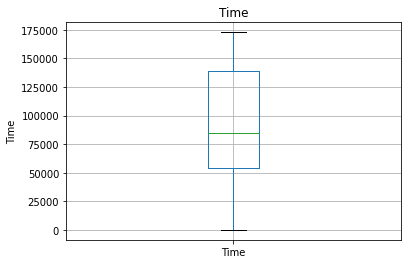

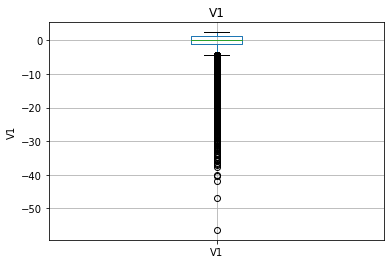

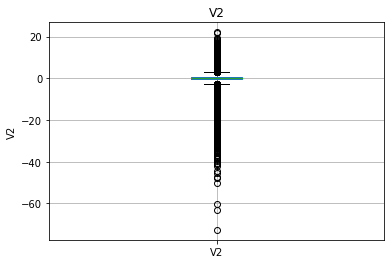

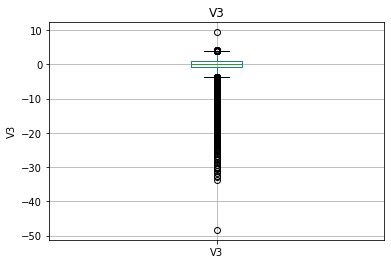

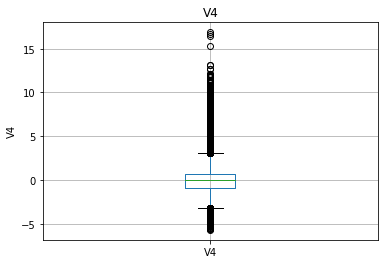

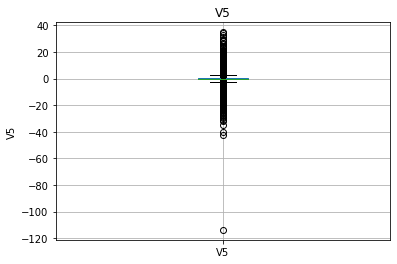

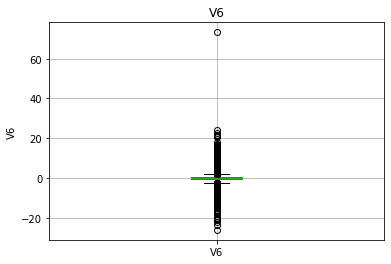

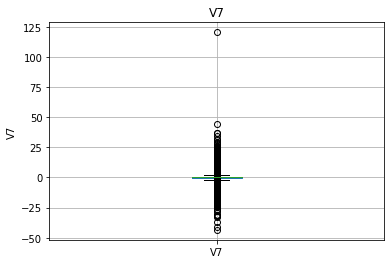

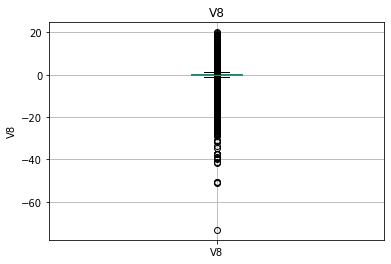

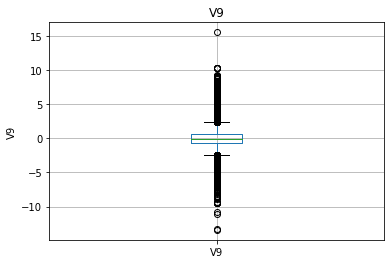

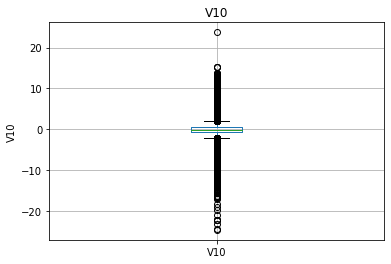

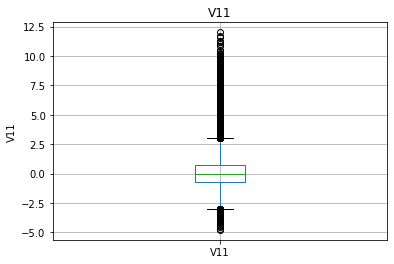

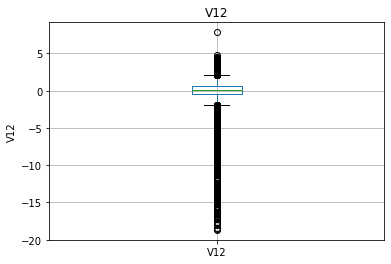

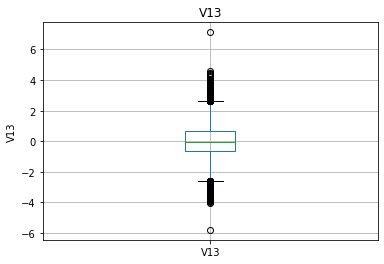

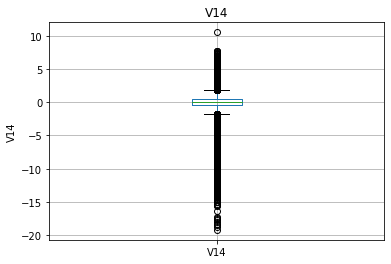

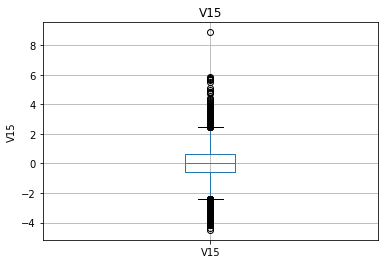

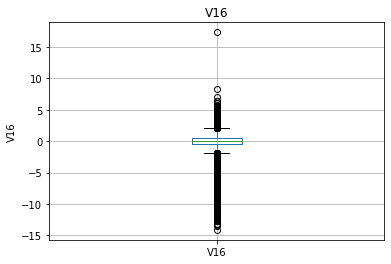

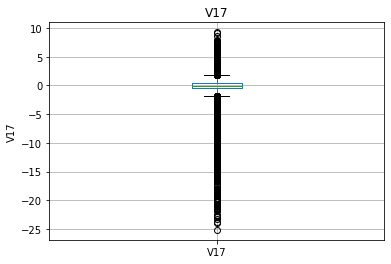

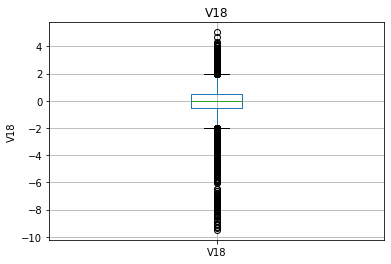

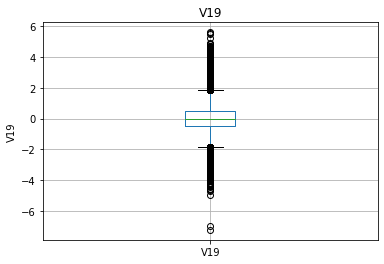

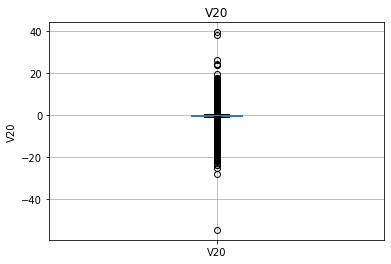

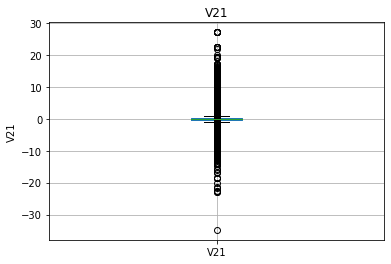

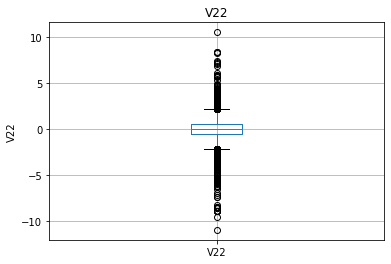

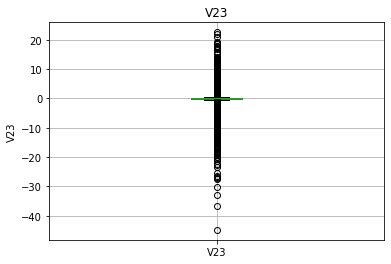

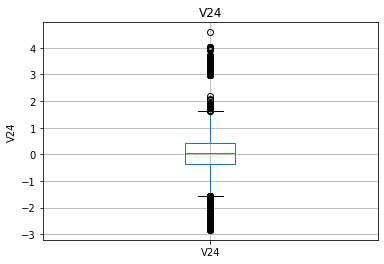

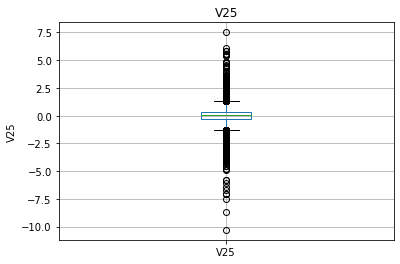

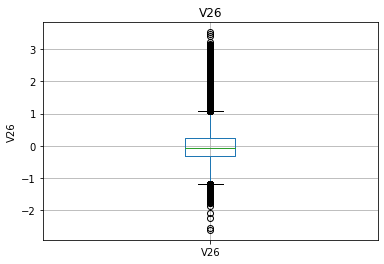

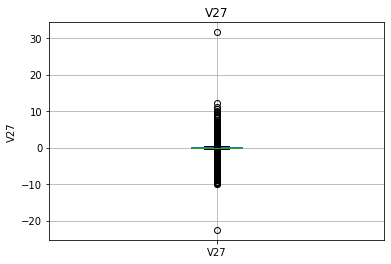

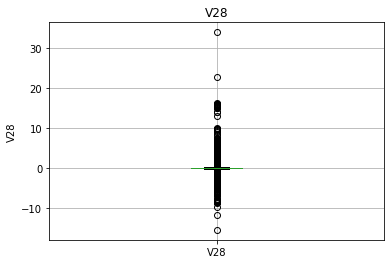

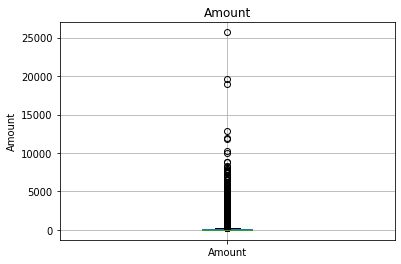

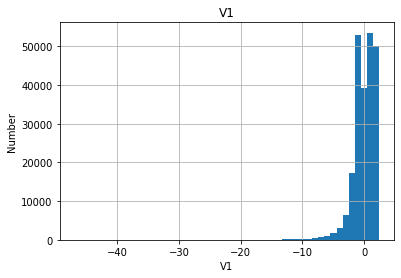

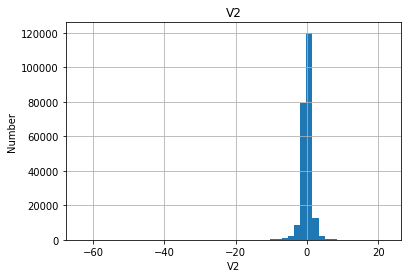

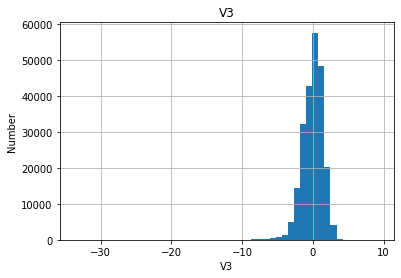

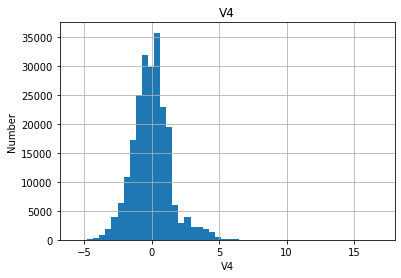

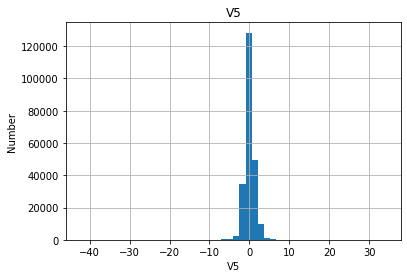

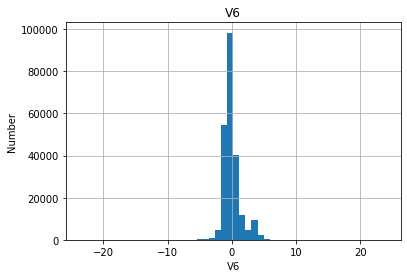

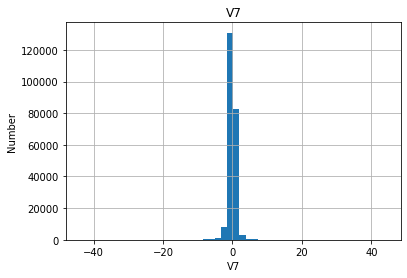

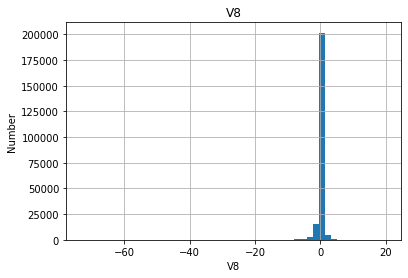

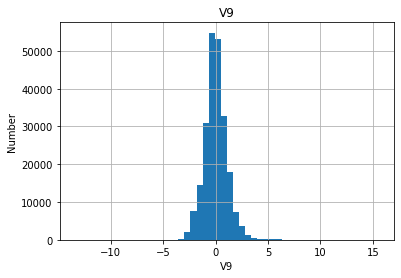

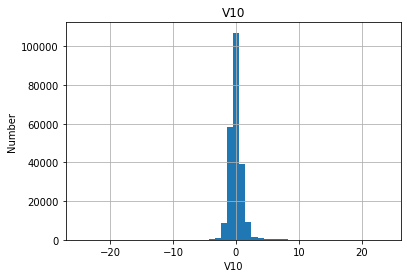

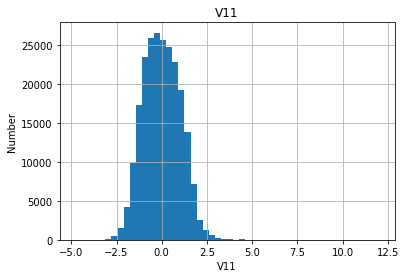

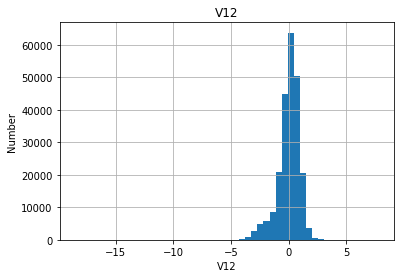

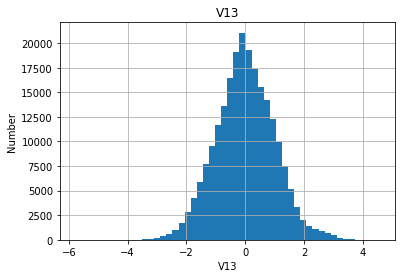

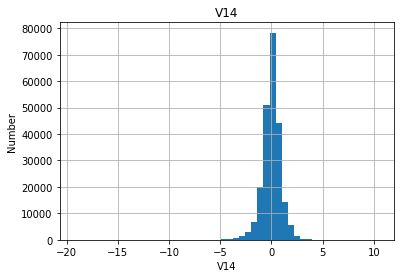

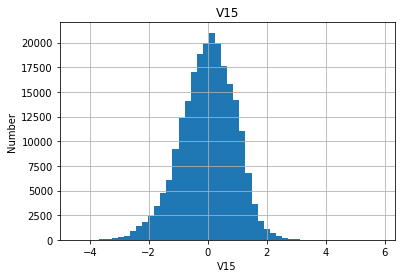

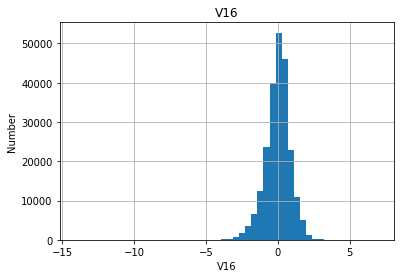

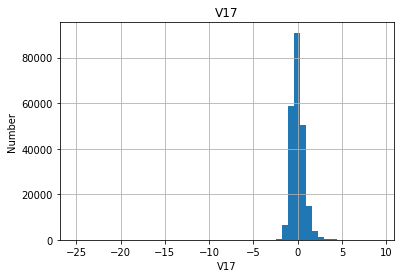

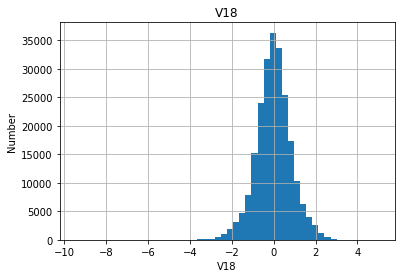

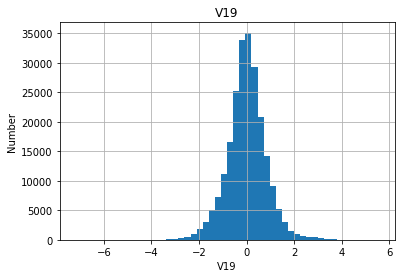

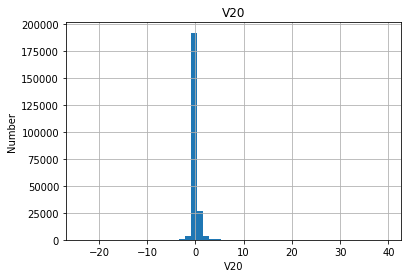

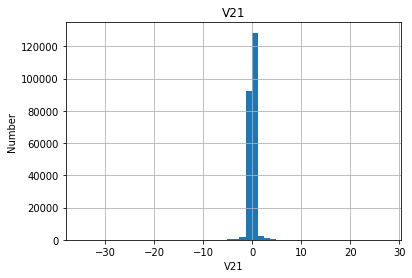

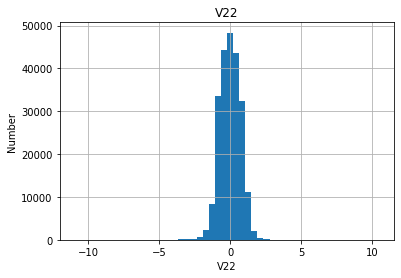

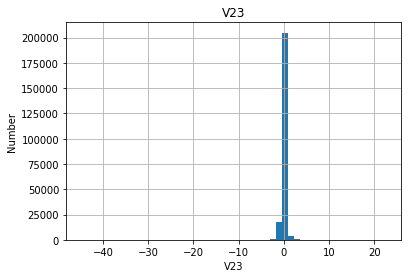

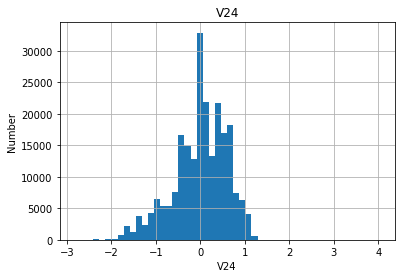

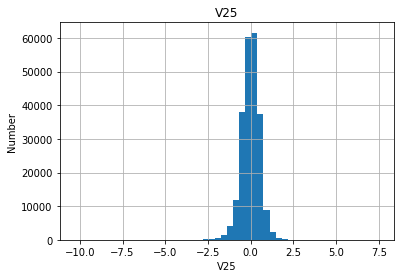

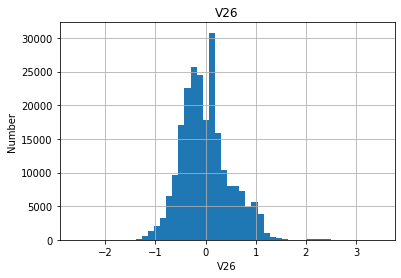

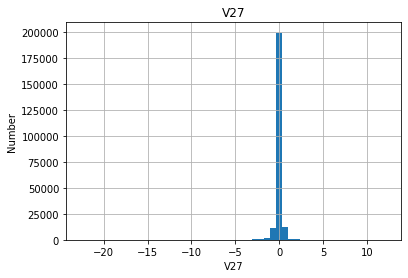

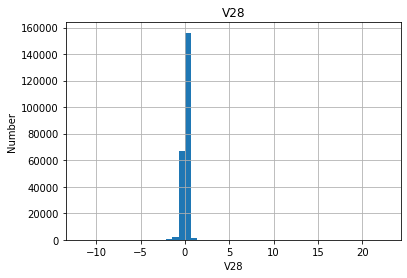

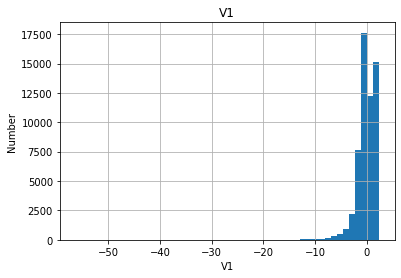

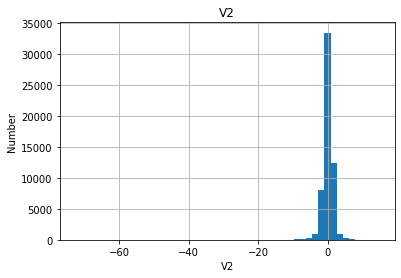

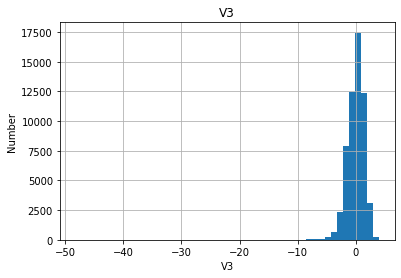

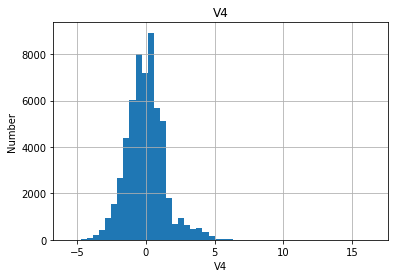

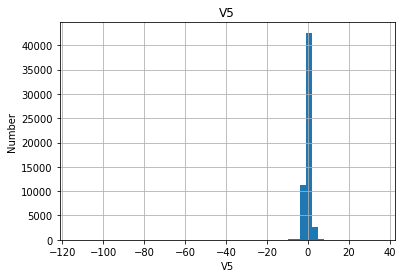

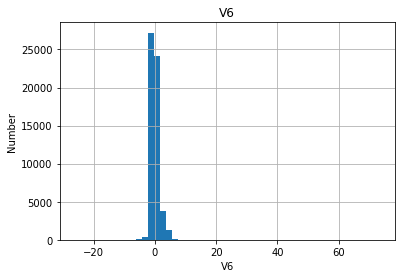

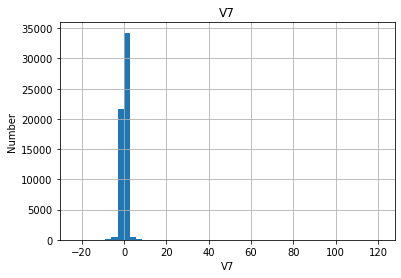

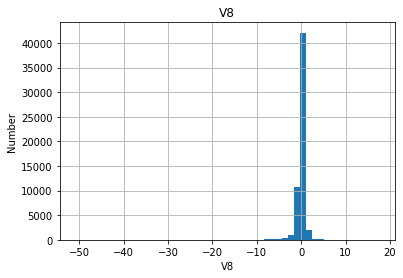

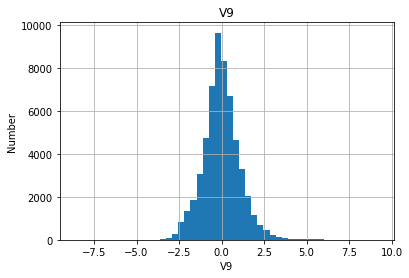

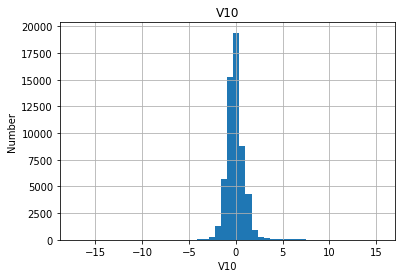

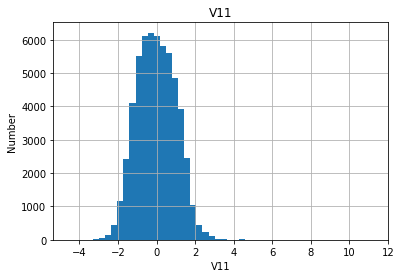

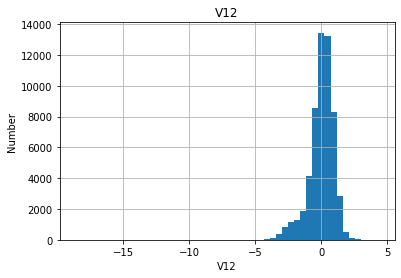

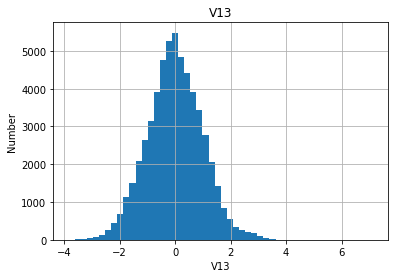

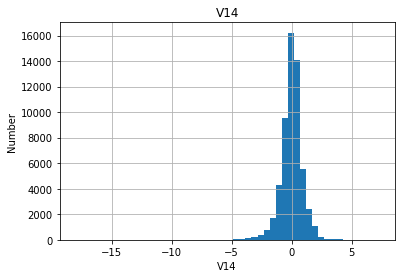

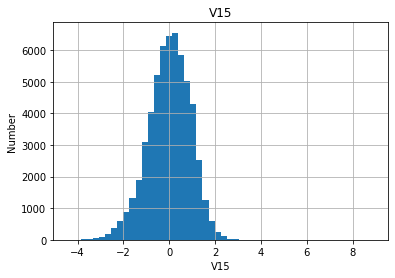

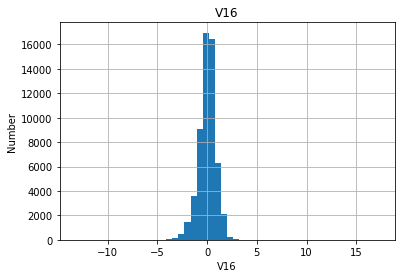

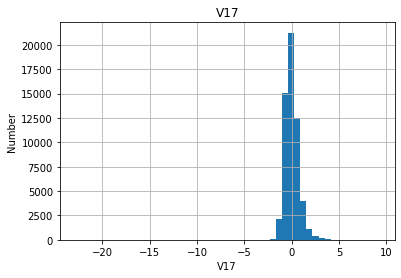

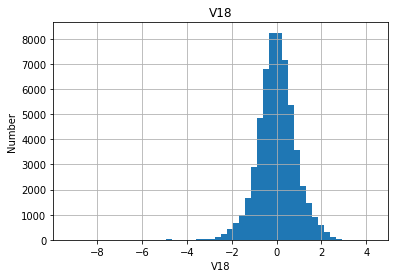

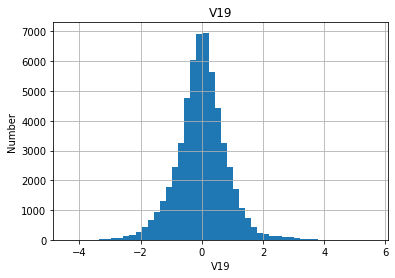

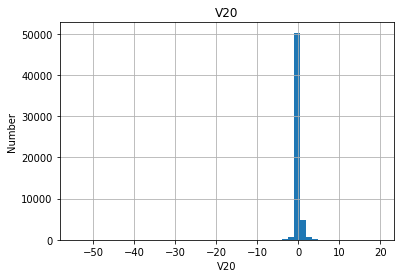

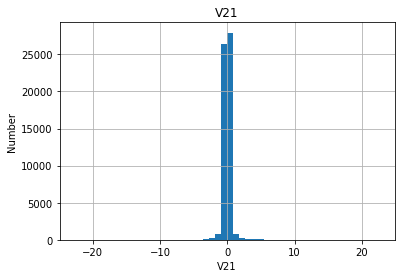

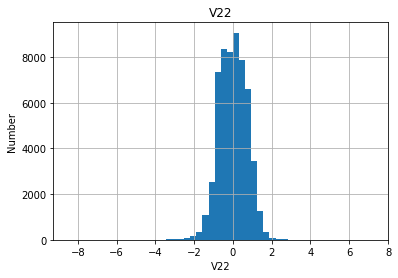

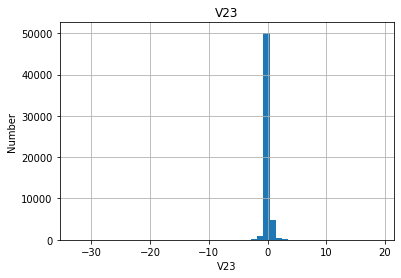

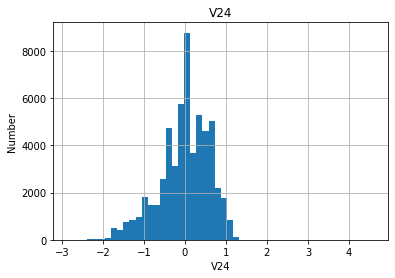

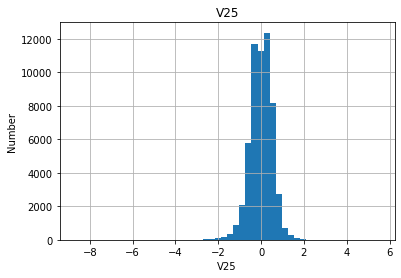

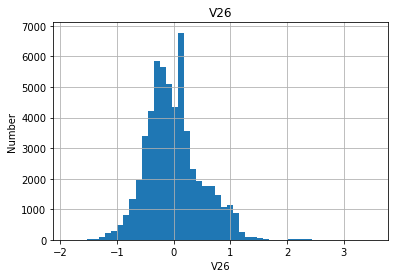

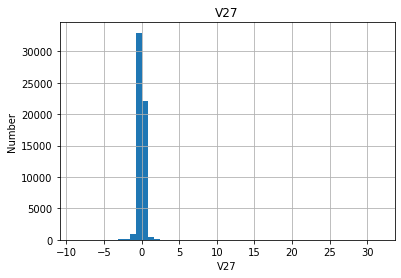

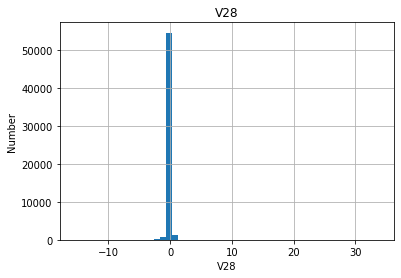

In [ ]:
# 4 -> non guassian distributed data,handling outliers
print('dataset columns:',data.columns)
print('conntinuous_numeric columns:',cont_numCols)
for var in cont_numCols:
  find_outliers(data,var)

# except Time ,all the columns having outliers

# visualising the data in the train
for var in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
  # X_train[var] = np.log(X_train[var])
  X_train[var].hist(bins = 50)
  plt.ylabel('Number')
  plt.xlabel(var)
  plt.title(var)
  plt.show()

for var in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
  # X_test[var] = np.log(X_test[var])
  X_test[var].hist(bins = 50)
  plt.ylabel('Number')
  plt.xlabel(var)
  plt.title(var)
  plt.show()






In [ ]:
X_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# -> step 5.handling rare categorical labels, Not needed this so skipping this

In [ ]:
# -> step 6.Encoding categorical variables,skipping this

In [ ]:
# -> step 7.Feature Scaling

X_train.to_csv('x_train.csv',index = False)
X_test.to_csv('x_test.csv',index = False)

print(X_train.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
# now scaling all columns except ('Class') as its the target

from sklearn.preprocessing import RobustScaler

train_vars = [ var for var in X_train if var not in ['Class']]
scaler = RobustScaler()

# fir the scaler to train data
scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)


# 4. feature Seclection
for feature selection ,we will choose Lasso regression as it has the capability to shrink some of the coefficients to 0 .

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

            Time        V1        V2  ...       V28    Amount  Class
68806  -0.371022 -0.508293  0.693250  ... -0.624111 -0.125852      0
40018  -0.524778  0.539432 -0.144698  ... -0.070845  0.049645      0
250360  0.823727  0.851344 -0.187367  ... -0.334280 -0.209985      0
234820  0.744617  0.905031  0.094333  ... -0.327054 -0.242664      0
10001  -0.818970 -0.384020  0.692627  ... -1.379989 -0.253233      0

[5 rows x 31 columns]


In [ ]:
y_train = X_train['Class']
y_test = X_test['Class']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
sel_.get_support()

array([False, False, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 30
selected features: 7
features with coefficients shrank to zero: 23


In [ ]:
# print the selected features
selected_feats

Index(['V3', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17'], dtype='object')

In [ ]:
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)
features = pd.read_csv('selected_features.csv')

In [ ]:
# model building

from sklearn import model_selection
from numpy import abs
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,X_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))

  
  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")

name:--->> Logistic Regression
----------------------------------
CV mean Score :0.9995851527161363,CV min:0.9993414263988328,CV std :0.0001123491943391509
----------------------------------
name:--->> Linear svc
----------------------------------
CV mean Score :0.9996356419109087,CV min:0.9992975060601209,CV std :0.00013032678378228565
----------------------------------
name:--->> Random forest classifier
----------------------------------
CV mean Score :0.9997783316969207,CV min:0.999604907906175,CV std :6.867845509769646e-05
----------------------------------
name:--->> knn 
----------------------------------
CV mean Score :0.9997212612007722,CV min:0.9995610376857107,CV std :7.38184988727203e-05
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :0.9887068917880727,CV min:0.9875897768890332,CV std :0.0006462367471299501
----------------------------------
name:--->> Decision TreeClassifier
----------------------------------
CV

In [71]:
# selecting a model
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[56854     7]
 [   23    78]]
0.9994733330992591


In [ ]:
# ###################################################################################


# ANN


In [73]:
# applying ann
# it involves building ann model and training annn model
import tensorflow as tf

ann = tf.keras.models.Sequential()

# adding input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units = 6,activation='relu'))

# adding second hidden layer
ann.add(tf.keras.layers.Dense(units = 6,activation='relu'))


# now adding output layer and as the out put is classifical model,activation function = sigmoid
ann.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))

# now training the ann
# first compiling
ann.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = 'accuracy')

# training ann model
ann.fit(X_train,y_train,batch_size = 32,epochs = 100)


Epoch 1/100
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0071 - accuracy: 0.9981
Epoch 2/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0016 - accuracy: 0.9984
Epoch 3/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0018 - accuracy: 0.9982
Epoch 4/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0018 - accuracy: 0.9982
Epoch 5/100
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0016 - accuracy: 0.9983
Epoch 6/100
7121/7121 [==============================] - 8s 1ms/step - loss: 7.0663e-04 - accuracy: 0.9993
Epoch 7/100
7121/7121 [==============================] - 8s 1ms/step - loss: 6.6630e-04 - accuracy: 0.9993
Epoch 8/100
7121/7121 [==============================] - 8s 1ms/step - loss: 6.5429e-04 - accuracy: 0.9993
Epoch 9/100
7121/7121 [==============================] - 9s 1ms/step - loss: 5.9193e-04 - accuracy: 0.9994
Epoch 10/100
7121/7121 [==============================] -

In [75]:
# # predicting loss on test model
y_pred = ann.predict(X_test,batch_size=32)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred]

In [76]:
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[56849    12]
 [   28    73]]
0.9992977774656788
